In [ ]:
# first imported the necessary library to read my data in CSV format and extract the details and checking the information.

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
from google.colab import files

# Upload your CSV file from your local machine to Colab
uploaded = files.upload()


Saving submission.csv to submission.csv


In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual file name
file_name = 'submission.csv'

# Read the CSV file into a DataFrame
text_df = pd.read_csv(file_name)

# Display the DataFrame
text_df.head()  # Display the first few rows of the DataFrame


,textID,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,exciting
2,eee518ae67,Recession
3,01082688c6,happy bday!
4,33987a8ee5,I like it!!


In [ ]:
#rename the column name
text_df.rename(columns={'selected_text': 'text'}, inplace=True)


In [ ]:
text_df.head()

,textID,text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,exciting
2,eee518ae67,Recession
3,01082688c6,happy bday!
4,33987a8ee5,I like it!!


In [ ]:
#finding null values
text_df.isnull().sum()

textID    0
text      0
dtype: int64

In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Last session of the day  http://twitpic.com/67ezh 

exciting 

Recession 

 happy bday! 

I like it!! 



In [ ]:
# I found my data set is textual data set so completed with the data preprocessing (filtering )
# by using python function I was dropping the duplicates value

In [ ]:
import pandas as pd
import re
import nltk

# Download the Punkt tokenizer data
nltk.download('punkt') # this function is used to tokenize the sentence into individual words.

def data_processing(text):
    text = text.lower()                               # Convert text to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs (http:// or https:// or www.) from the text
    text = re.sub(r'\@\w+|\#','',text)                # Remove Twitter usernames (mentions) and hashtags
    text = re.sub(r'[^\w\s]','',text)                 # Remove special characters and punctuation, keeping only words and spaces
    text_tokens = nltk.word_tokenize(text)            # Tokenize the text into individual words
    filtered_text = [w for w in text_tokens if not w in stop_words]     # Remove stop words from the tokenized text
    return " ".join(filtered_text)                    # Join the filtered words back into a single string


text_df['text'] = text_df['text'].apply(data_processing) # Apply the data_processing function to the 'text' column


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text_df.head()

,textID,text
0,f87dea47db,last session day
1,96d74cb729,exciting
2,eee518ae67,recession
3,01082688c6,happy bday
4,33987a8ee5,like


In [ ]:
text_df = text_df.drop_duplicates('text')  # droping the duplicates value

In [ ]:
# After that, I apply stemming to a list of words in the input data.
# This process utilizes the widely recognized and extensively employed stemming algorithm,
# which effectively reduces words to their root or base form.

# Steming

Afterwards, I apply stemming to a word list in the input data. This process utilizes a widely recognized and extensively employed stemming algorithm, which effectively reduces words to their root or base form.

Stemming is used to handle variations of words that have the same meaning, such as plurals, verb tenses, and related forms of words. By reducing words to their common root form, stemming helps in treating these variations as a single token.

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,textID,text
0,f87dea47db,last session day
1,96d74cb729,exciting
2,eee518ae67,recession
3,01082688c6,happy bday
4,33987a8ee5,like


In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

last session day 

exciting 

recession 

happy bday 

like 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 3532
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textID  2703 non-null   object
 1   text    2703 non-null   object
dtypes: object(2)
memory usage: 63.4+ KB


# Polarity
Applied The polarity function, it takes a text as input and returns the polarity score of that text.

Here are the common polarities used in sentiment analysis:

Positive: Text expresses a positive sentiment or opinion. For example, "I love this product!"

Negative: Text expresses a negative sentiment or opinion. For example, "I hate Mondays."

Neutral: Text does not express a strong positive or negative sentiment. For example, "The weather is okay today."

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['text'].apply(polarity)


In [ ]:
text_df.head(10)

,textID,text,polarity
0,f87dea47db,last session day,0.0
1,96d74cb729,exciting,0.3
2,eee518ae67,recession,0.0
3,01082688c6,happy bday,0.8
4,33987a8ee5,like,0.0
5,726e501993,visitors,0.0
6,261932614e,hates,0.0
7,afa11da83f,blocked,0.0
8,e64208b4ef,within short time last clue,0.0
9,37bcad24ca,get day alright havent done anything yet leavi...,0.0


In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head(15)

,textID,text,polarity,sentiment
0,f87dea47db,last session day,0.000000,Neutral
1,96d74cb729,exciting,0.300000,Positive
2,eee518ae67,recession,0.000000,Neutral
3,01082688c6,happy bday,0.800000,Positive
4,33987a8ee5,like,0.000000,Neutral
5,726e501993,visitors,0.000000,Neutral
6,261932614e,hates,0.000000,Neutral
7,afa11da83f,blocked,0.000000,Neutral
8,e64208b4ef,within short time last clue,0.000000,Neutral
9,37bcad24ca,get day alright havent done anything yet leavi...,0.000000,Neutral


### Bar Graph with Counts

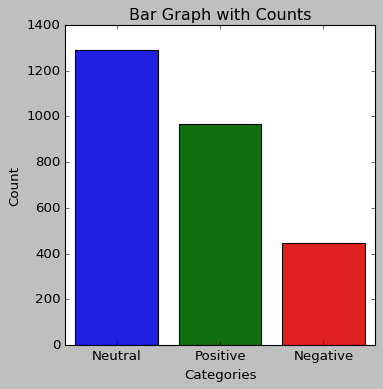

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)
# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Graph with Counts')

# Display the countplot
plt.show()

Here, we can observe that our dataset comprises 1300 positive tweets, 1100 neutral tweets, and 500 negative tweets, as depicted in the bar graph.

### Pie Chart with Percentage

Text(0.5, 1.0, 'Distribution of sentiments')

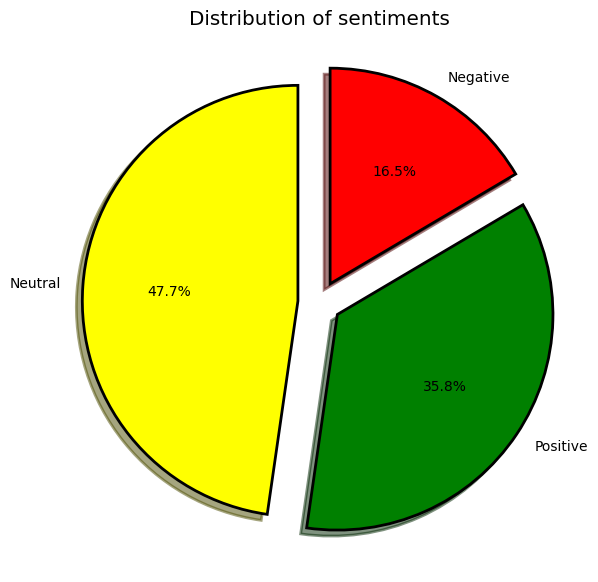

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ( "yellow","green", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

Here, we can observe that our dataset comprises 37.1% positive tweets, 45.9% neutral tweets, and 17.1% negative tweets, as depicted in the pie graph.

### Positive Tweets - Most frequent words in Positive tweets

In [ ]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,textID,text,polarity,sentiment
212,fc49e426f5,best,1.0,Positive
386,a9b9f7a878,awesome,1.0,Positive
2233,206aba0edd,yea someone getting best,1.0,Positive
102,3ab338c459,delicious,1.0,Positive
1786,ee89b16825,perfect,1.0,Positive


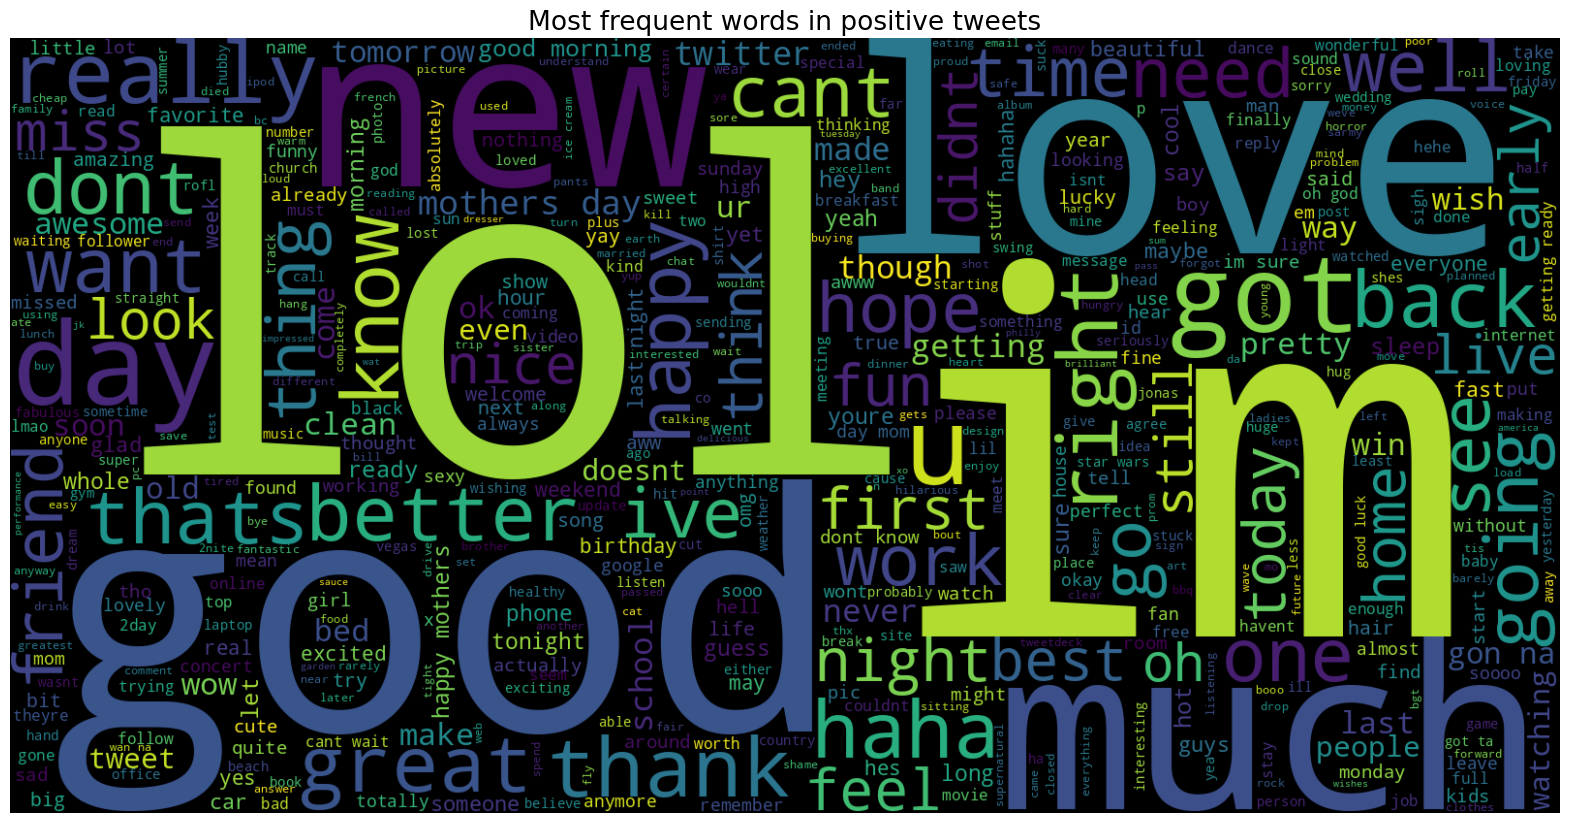

In [ ]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

### Negative Tweets - Most frequent words in negative tweets

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,textID,text,polarity,sentiment
1371,c99820b355,ok feel like need cry cant believe less 2 year...,-0.001667,Negative
3159,9dec21d822,hahah hear mvp chants atlantas arena least get...,-0.007143,Negative
2163,b86d2cca27,also swirly flat white,-0.012500,Negative
904,131da67079,creepy first really grow like cried like baby ...,-0.016667,Negative
331,791b4a40af,long think next weekend open going house warmi...,-0.016667,Negative


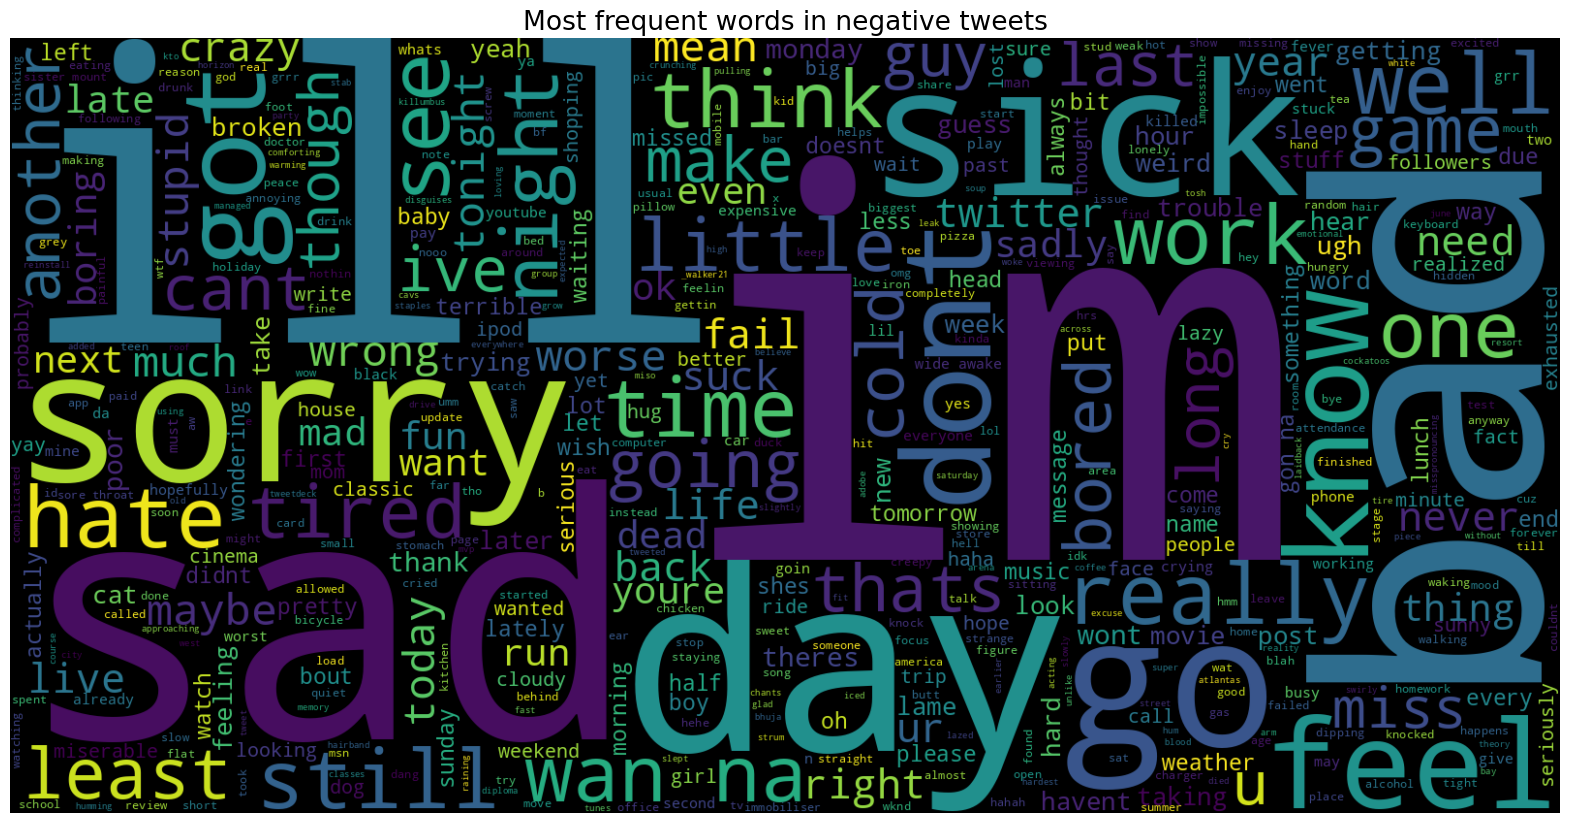

In [ ]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

### Neutral Tweets - Most frequent words in Neutral tweets

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,textID,text,polarity,sentiment
0,f87dea47db,last session day,0.0,Neutral
2383,489b7fc86b,hugs,0.0,Neutral
2331,c28bdcf8dc,fingers hurt,0.0,Neutral
2330,b221ecd789,tweet tweet suckas,0.0,Neutral
2328,8e48929733,ipod died today,0.0,Neutral


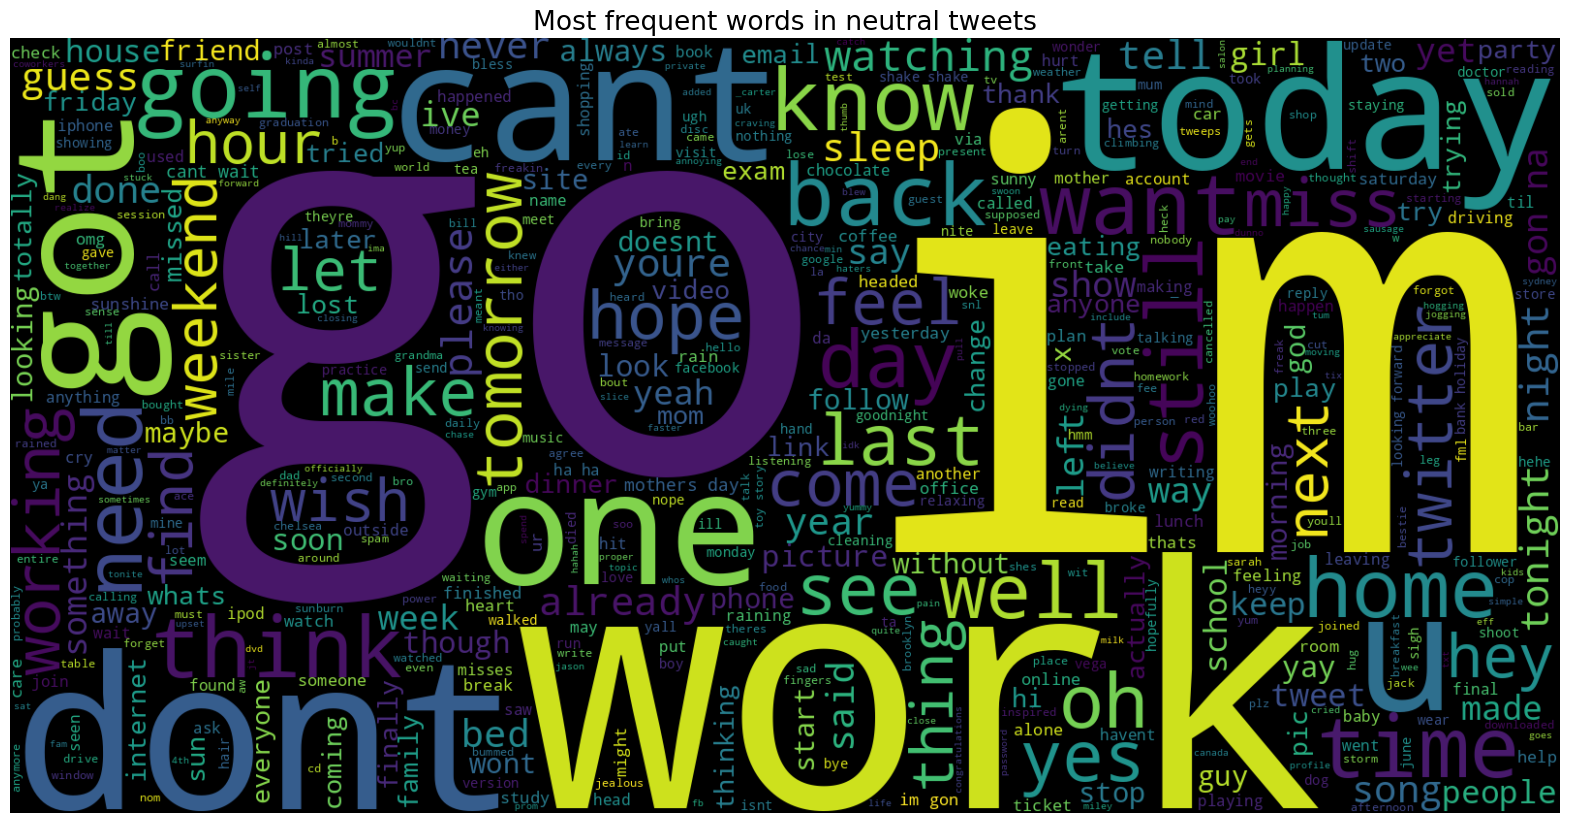

In [ ]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

### Counter vectorization

Counter vectorization identifies words or terms that are discriminative and unique to individual documents or less common across the entire corpus. It is a natural language processing (NLP) process.

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))


Number of features: 16920

First 20 features:
 ['000' '010' '010 050' '050' '050 slowly' '09' '0930' '0930 range' '10'
 '10 167' '10 first' '10 ive' '10 minute' '10 new' '10 photos' '10 pounds'
 '10 years' '100' '100000' '100000 60']


In [ ]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (2162, 16920)
Size of y_train: (2162,)
Size of x_test: (541, 16920)
Size of y_test: (541,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 81.52%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 37  36   6]
 [  0 257   3]
 [  1  54 147]]


              precision    recall  f1-score   support

    Negative       0.97      0.47      0.63        79
     Neutral       0.74      0.99      0.85       260
    Positive       0.94      0.73      0.82       202

    accuracy                           0.82       541
   macro avg       0.89      0.73      0.77       541
weighted avg       0.85      0.82      0.81       541



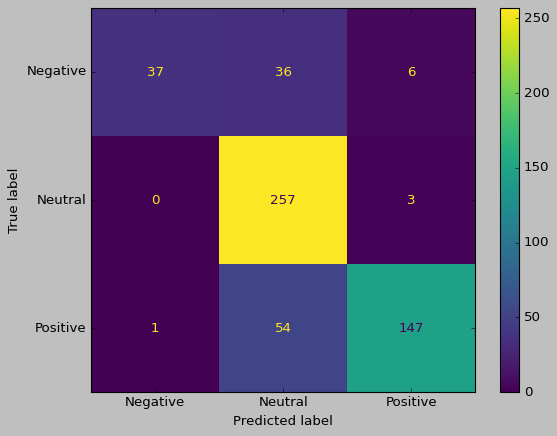

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.92%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 40  34   5]
 [  1 256   3]
 [  1  43 158]]


              precision    recall  f1-score   support

    Negative       0.95      0.51      0.66        79
     Neutral       0.77      0.98      0.86       260
    Positive       0.95      0.78      0.86       202

    accuracy                           0.84       541
   macro avg       0.89      0.76      0.79       541
weighted avg       0.86      0.84      0.83       541



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 84.66%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 42  32   5]
 [  2 256   2]
 [  2  40 160]]


              precision    recall  f1-score   support

    Negative       0.91      0.53      0.67        79
     Neutral       0.78      0.98      0.87       260
    Positive       0.96      0.79      0.87       202

    accuracy                           0.85       541
   macro avg       0.88      0.77      0.80       541
weighted avg       0.87      0.85      0.84       541



In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.66%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 42  32   5]
 [  2 256   2]
 [  2  40 160]]


              precision    recall  f1-score   support

    Negative       0.91      0.53      0.67        79
     Neutral       0.78      0.98      0.87       260
    Positive       0.96      0.79      0.87       202

    accuracy                           0.85       541
   macro avg       0.88      0.77      0.80       541
weighted avg       0.87      0.85      0.84       541

